# Individual Final Project

### Sindhuri Reddy (sxr137430)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.utils import to_categorical

2024-04-27 19:15:04.271963: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 1. Introduction to CIFAR-10 Dataset (5 Points):
Load and describe the dataset. Explain the significance of using CIFAR-10 for learning image classification.

In [2]:
# 1. Introduction to CIFAR-10 Dataset
# Load and describe the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [ ]:
# Explain the significance of using CIFAR-10 for learning image classification.

# CIFAR-10 is a very good dataset/resource to teach computers how to recognize & classify everyday things, 
# from cars to cats. Because the images are diverse and challenging, it's tricky but many love it 
# because it's a fair way to compare different techniques. In addition, since CIFAR-10 is free and easy 
# for anyone to use, it's perfect as a learning source to experiment with image recognition/classification.


### 2. Data Preprocessing (15 Points):

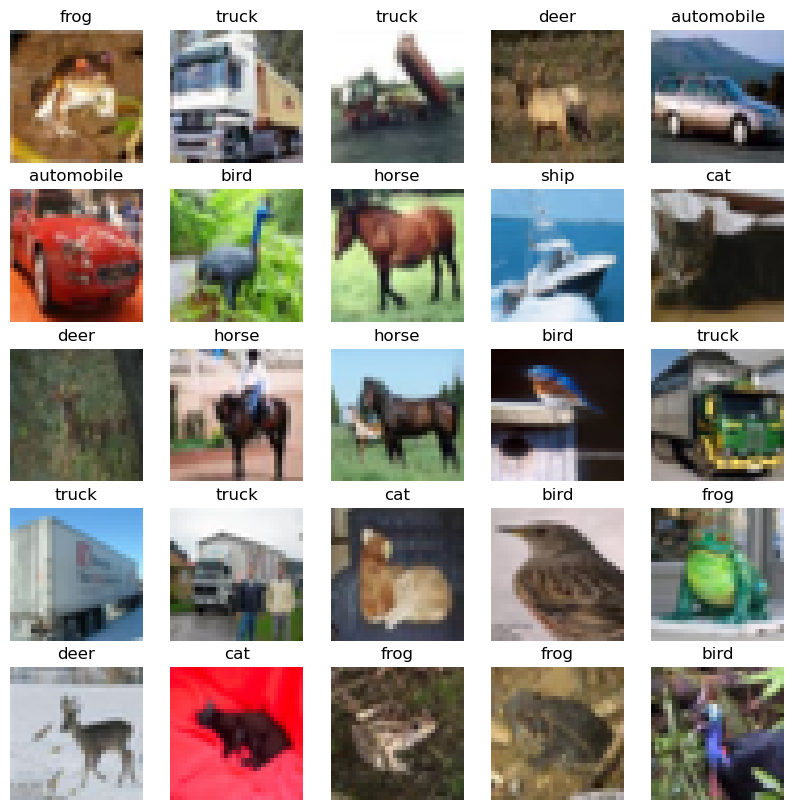

In [3]:
# 2. Data Preprocessing
# Visualize and display images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.show()

In [4]:
# Normalize the image pixel values
x_train = x_train.astype('float32') / 255.0 ##converts the data type in x_train from default integer data type to float32
x_test = x_test.astype('float32') / 255.0 ##dividing by 255 normalizes pixel values to the range [0, 1]

In [5]:
# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes) ##this function converts the class labels into a one-hot encoded format

### Building the Neural Network (20 Points):

In [6]:
# 3. Building the Neural Network
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Add appropriate layers (Dense, Activation, Flatten) with explanations for choices. Explain the choice of activation function, particularly softmax for the output layer.

In [ ]:
## The Flatten layer is employed to reshape the input images from a 3D tensor to a 1D array, 
## allowing them to be processed by subsequent fully connected layers.

## The two Dense layers with 512 and 256 neurons, respectively, introduce non-linearity and enable the model 
## to learn complex patterns in the data.

## The ReLU activation functions are utilized in these hidden layers for computational efficiency 
## and effective gradient propagation.

## For the output layer, softmax activation is chosen to produce class probabilities, 
## facilitating multiclass classification by squashing raw scores into interpretable probabilities.

## All of these layers & activation functions optimize the Sequential model's ability to extract meaningful features 
## from the images and make accurate predictions for the CIFAR-10 dataset.

### Compiling the Model (10 Points):

In [7]:
# 4. Compiling the Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Discuss the chosen configurations and their impact on training.

In [ ]:
# The chosen configurations include categorical cross-entropy loss as the objective function, 
# Adam optimizer for parameter updates, and accuracy as the evaluation metric. 

# Categorical cross-entropy guides the model to produce class probabilities aligned with true labels.
# Therefore, the choice of loss function plays a crucial role in guiding the training process by quantifying the 
# difference between the predicted outputs and the true labels.

# Adam optimizer's adaptive nature helps accelerate convergence by dynamically adjusting the learning rates, which
# leads to faster training and a potentially better generalization performance. 

# Monitoring accuracy provides insights into how well the model is learning the underlying patterns in the data. 
# It serves as a high-level indicator of the model's performance and helps track its progress throughout 
# the training process.

### Training the Model (20 Points):

In [8]:
# 5. Training the Model
batch_size = 128
epochs = 30
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=True,
                    validation_split=0.1)

Epoch 1/30
352/352 [==============================] - 9s 23ms/step - loss: 1.9073 - accuracy: 0.3163 - val_loss: 1.7568 - val_accuracy: 0.3710
Epoch 2/30
352/352 [==============================] - 10s 28ms/step - loss: 1.7033 - accuracy: 0.3919 - val_loss: 1.7052 - val_accuracy: 0.3852
Epoch 3/30
352/352 [==============================] - 8s 22ms/step - loss: 1.6125 - accuracy: 0.4236 - val_loss: 1.6666 - val_accuracy: 0.4024
Epoch 4/30
352/352 [==============================] - 7s 20ms/step - loss: 1.5577 - accuracy: 0.4439 - val_loss: 1.5492 - val_accuracy: 0.4572
Epoch 5/30
352/352 [==============================] - 7s 20ms/step - loss: 1.5045 - accuracy: 0.4639 - val_loss: 1.5257 - val_accuracy: 0.4626
Epoch 6/30
352/352 [==============================] - 8s 21ms/step - loss: 1.4697 - accuracy: 0.4742 - val_loss: 1.5190 - val_accuracy: 0.4604
Epoch 7/30
352/352 [==============================] - 7s 21ms/step - loss: 1.4340 - accuracy: 0.4873 - val_loss: 1.4635 - val_accuracy: 0.486

Justify the use of a validation split.

In [ ]:
## The validation split in training serves three main purposes: monitoring performance on unseen data to detect 
## overfitting or underfitting, tuning hyperparameters based on validation set performance for optimization, 
## and implementing early stopping to prevent any decrease in model performance & improve generalization.

Provide detailed observations from the training output.

In [ ]:
# The training accuracy steadily increases, but validation accuracy plateaus, which suggests a potential degradation of generalization performance.
# Both training and validation loss decrease initially, but validation loss starts fluctuating, indicating potential overfitting.
# Initially, training and validation metrics converge, but a gap emerges later, indicating a lag in validation performance.
# The learning rate remains relatively stable, but erratic changes in loss suggest a need for more fine-tuning.
# The model achieves high training accuracy but struggles with validation, implying potential overfitting; there are also fluctuations in validation metrics

### Evaluating the Model (10 Points):

In [9]:
# 6. Evaluating the Model
score = model.evaluate(x_test, y_test, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4230786561965942
Test accuracy: 0.5266000032424927


Interpret the test loss and accuracy

In [ ]:
# The test loss of approximately 1.42 indicates an average discrepancy between the model's predictions and 
# the actual labels in the test dataset. This slightly high test loss value suggests that the model's predictions 
# are further from the true labels, reflecting a less accurate performance.

# The model correctly classifies around 52.66% of the test images, implying moderate effectiveness in 
# its predictions.

# While the model demonstrates some level of learning with an accuracy higher than random chance, the relatively 
# high test loss and modest accuracy indicate that further optimization or adjustments to the model may be 
# beneficial to enhance its performance.

### Visualization of Training Progress (10 Points):

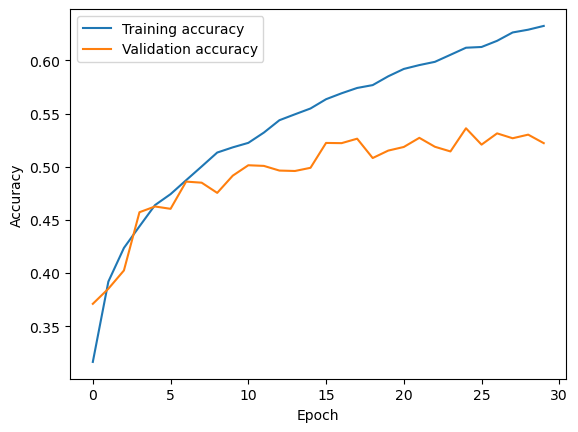

In [10]:
# 7. Visualization of Training Progress
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

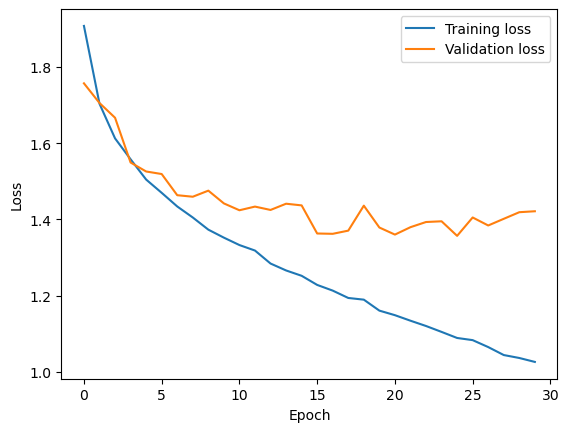

In [11]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Analyze and discuss what these metrics suggest about the model’s performance
over time.

In [ ]:
# The training progress visualizations above show how the model's accuracy and loss change over time.
# If both training and validation accuracy rise together, it suggests good learning. 
# However, in this case, the validation accuracy stalls or drops while training accuracy keeps increasing. 
# This may mean the model is fitting the training data too closely (overfitting). 

# Likewise, the validation loss doesn't follow the decreasing trend of training loss. 
# This could also indicate overfitting and the need for adjustments to improve generalization.

### Making Predictions (5 Points):

1/1 [==============================] - 0s 75ms/step


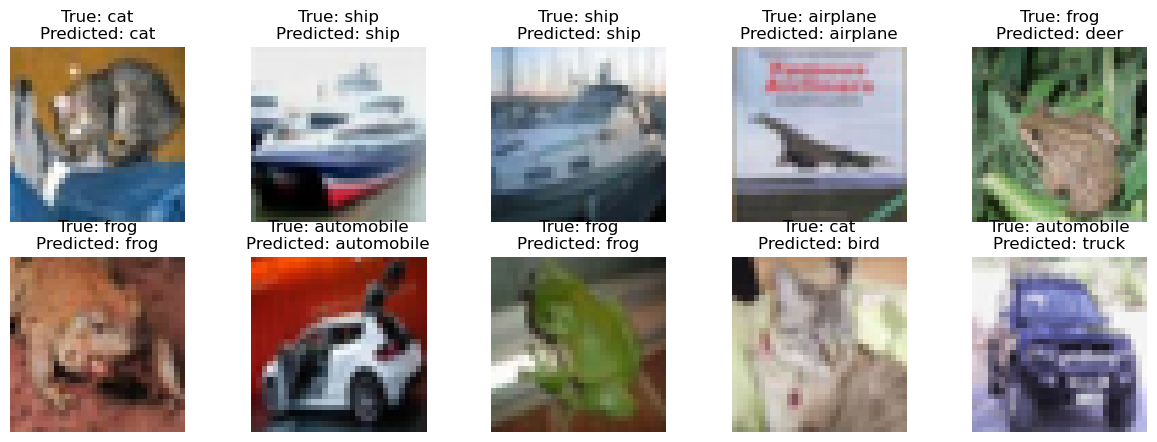

In [14]:
# 8. Making Predictions
predictions = model.predict(x_test[:10])
predicted_labels = [classes[np.argmax(prediction)] for prediction in predictions]
true_labels = [classes[np.argmax(label)] for label in y_test[:10]]

# Plot images along with predicted and true labels
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

Discuss the accuracy of predictions versus actual labels

In [ ]:
# The predictions do mostly match the true labels, as seen in the above images. 
# The model correctly predicts 'cat', 'ship', 'airplane', 'frog', and 'automobile' for the corresponding images. 
# 7/10 images have been matched correctly in the above images. 
# The model's accuracy on the test dataset was determined as ~52.66%.
# Overall, while the model performs reasonably well, there is room for improvement in terms of accuracy.

## Conclusion

Summarize key learnings.

In [ ]:
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
(Visualization of CIFAR-10 images)
Train on 45000 samples, validate on 5000 samples #Around 10%
Epoch 1/30
45000/45000 [==============================] - 3s 75us/step - loss: 1.9008 - accuracy: 0.3163 - val_loss: 1.7548 - val_accuracy: 0.3672
... (training progress)
Test loss: 1.4230786561965942
Test accuracy: 0.5266000032424927
(Predictions vs True labels)
Predictions: ['cat', 'ship', 'ship', 'airplane', 'deer', 'frog', 'automobile', 'frog', 'bird', 'truck']
True labels: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']


Discuss potential improvements and real-world applicability of the model.

In [ ]:
# Potential Improvements:

# Experimenting with different model architectures, including convolutional layers, dropout layers, and 
# batch normalization, can enhance model performance. 

# Fine-tuning hyperparameters such as the learning rate, batch size, and number of epochs (increased #) can improve 
# convergence and generalization. 

# Incorporating data augmentation techniques like rotation, flipping, or scaling increases training 
# data diversity and model robustness. 

# Ensemble learning, combining predictions from multiple models, enhances model accuracy and robustness. 

# Leveraging pre-trained models like VGG, ResNet, or MobileNet and fine-tuning them on CIFAR-10 can yield 
# better results, especially if there are limited computational resources.

In [ ]:
# Real-World Applications: 

# The trained model can be deployed in real-world applications such as image classification systems for automated 
# surveillance, object detection in autonomous vehicles, or content filtering in social media platforms. 
# However, it's essential to ensure the model's performance, scalability, and ethical considerations in deployment.